# TELCO_CUSTOMER_CHURN

# Data understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Importing and exploring the data :

In [2]:
#Loading data
data=pd.read_excel('Telco_customer_churn.csv.xlsx')

In [3]:
def get_dt_size(data, header='Dataset dimensions'):
  print(header,
        '\n# Attributes: ', data.shape[1], 
        '\n# Entries: ', data.shape[0],'\n')
  
get_dt_size(data)

Dataset dimensions 
# Attributes:  33 
# Entries:  7043 



In [4]:
#Dataset columns and their values
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
#Columns type
data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
#Dataset description
data.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
#Unique values of each column
data.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Score            85
CLTV                 3438
Churn Reason           20
dtype: int64

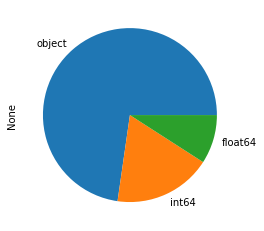

In [9]:
#statistics for column types
data.dtypes.value_counts().plot.pie()

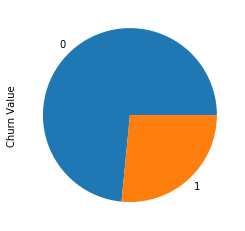

In [10]:
#customer churn statistics
data['Churn Value'].value_counts().plot.pie()
plt.show()

In [11]:
# helper funtion - display count plot
def displayCountPlot(cat_list, dt, rows=1, columns=3, figsize=(14,2.5), export=False):
  
  """
    Display countplot based on a set of features

    # Arguments
      cat_list: array, List of features
      dt: DataFrame, dataset
      rows: int, number of rows
      columns: int, number of columns
      figsize: figure size, e.g (10, 5)

  """

  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=dt[c], data=dt)

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, dt.shape[0])

  if export :
    save_img(fig, ax)

  plt.tight_layout()
  plt.show()

  return fig


def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")

def save_img(fig, ax):
  fig.savefig(ax.get_title(), dpi=600)

In [12]:


personal_attributes = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']
services_attributes = ['Phone Service', 'MultipleLines', 'Internet Service', 'Online Security',
                          'Online Backup', 'Device Protection', 'TechSupport', 'Streaming TV',
                          'Streaming Movies']
contract_attributes = ['Contract', 'Paperless Billing', 'Payment Method']

C:\Users\MSI GF63\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


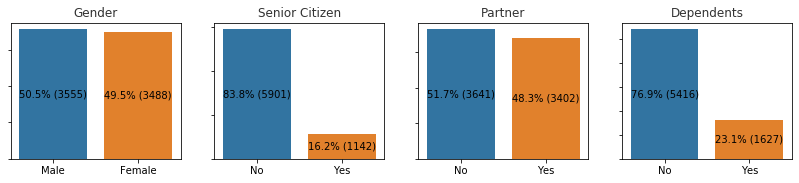

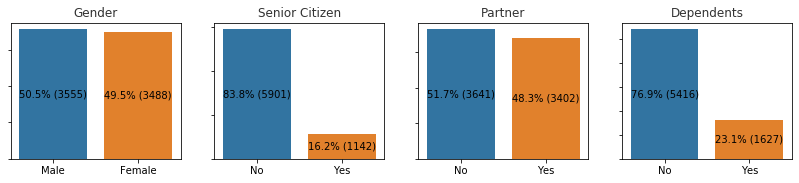

In [13]:
displayCountPlot(personal_attributes, data, rows=1, columns=4, export=True)

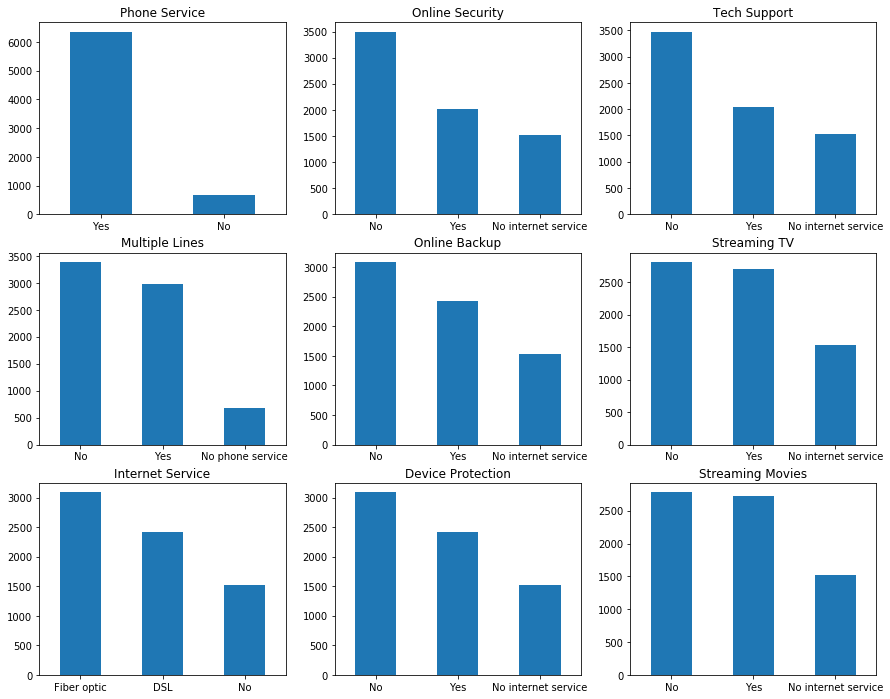

In [14]:
# display of services statistics
services = ['Phone Service','Multiple Lines','Internet Service','Online Security',
           'Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

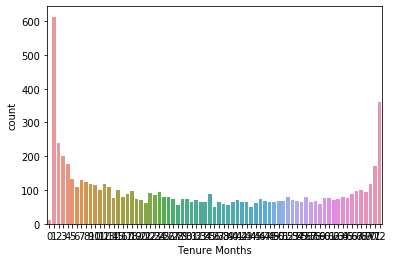

In [15]:
#Display of Tenure months: Number of months the customer has stayed with the company
sns.countplot(data['Tenure Months'])
plt.show()

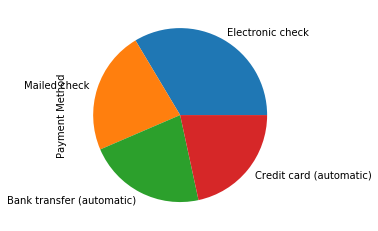

In [16]:
#pourcentage of  "Payment Method"
data["Payment Method"].value_counts().plot.pie()

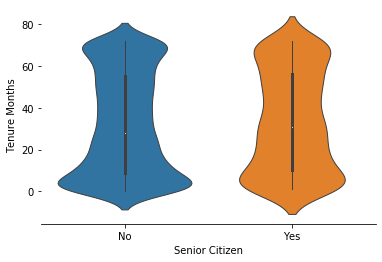

In [17]:
#display of the SeniorCitizen featuring the Tenure Months
#sns.violinplot(data=data, x='SeniorCitizen', y='MonthlyCharges', hue='ChurnValue',linewidth=1)
#sns.despine(left=True)

sns.violinplot(data=data, x='Senior Citizen', y='Tenure Months',linewidth=1)
sns.despine(left=True)

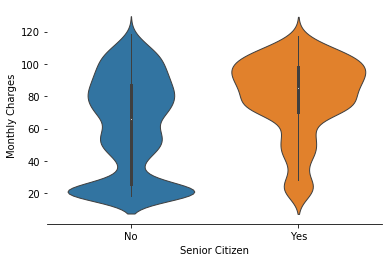

In [18]:
#display of the SeniorCitizen featuring the Monthly Charges

sns.violinplot(data=data, x='Senior Citizen', y='Monthly Charges',linewidth=1)
sns.despine(left=True)

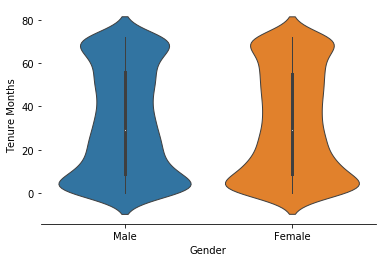

In [19]:
#display of the Gender featuring the Tenure Months

sns.violinplot(data=data, x='Gender', y='Tenure Months',linewidth=1)
sns.despine(left=True)

In [20]:
# We have to encode the Senior Citizen variable since the violinplot function cannot take two object type variables as parameters
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Senior Citizen'] = labelencoder.fit_transform(data['Senior Citizen']) # label encoder=conversion

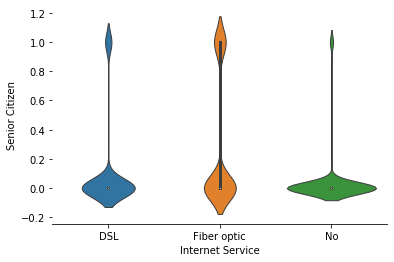

In [21]:
#display of the SeniorCitizen featuring the Internet Service

sns.violinplot(data=data, x='Internet Service', y='Senior Citizen',linewidth=1)
sns.despine(left=True)

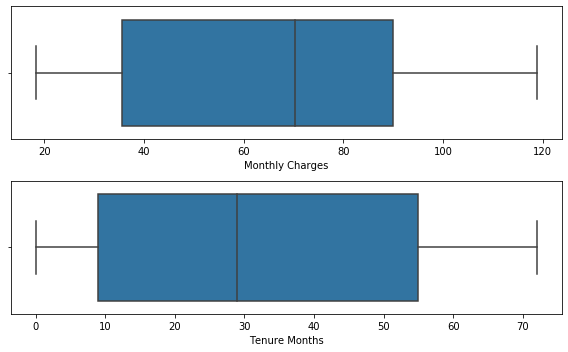

In [22]:
fig, ax = plt.subplots(ncols=1, nrows=2, figsize=(8,5))
sns.boxplot(data['Monthly Charges'], ax=ax[0])
sns.boxplot(data['Tenure Months'], ax=ax[1])
plt.tight_layout()
#The display of the box plot shows :For the monthly charges it's in the median

#monthly charges  median=70 , Q1=35, Q3=90 
#Par rapport à la position de la médiane elle est plus du coté du Q3 car la
#dispersion des données de l'attribut Monthly charges est concentré dans l'intervalle 35 - 70


#tenure months  median=28 , Q1=9, Q3=55
#Par rapport à la position de la médiane elle est plus du coté du Q1 car la
#dispersion des données de l'attribut tenure months est concentré dans l'intervalle 26 - 55

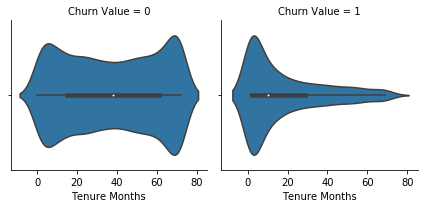

In [23]:
#display of the churn value featuring the Tenure Months

sns.FacetGrid(data, col='Churn Value').map(sns.violinplot, 'Tenure Months', order=[0,1])

#### Observation:
Customers with low tenure are significantly more likely to churn.
 At the same time customers who didn't churn are spread over a wide range of tenure.

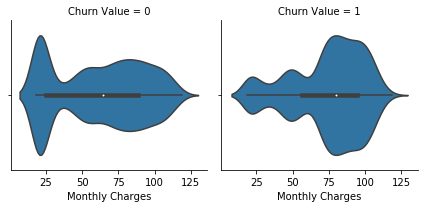

In [24]:
#display of the churn value featuring the Monthly charges

sns.FacetGrid(data, col='Churn Value').map(sns.violinplot, 'Monthly Charges', order=[0,1])

#### Observation:
 Les clients dont les frais mensuels sont élevés sont beaucoup plus susceptibles de changer d'opérateur
que les clients ayant un faible montant de frais mensuels. D'autre part, les clients
avec des frais mensuels peu élevés ont plus de chances de rester.

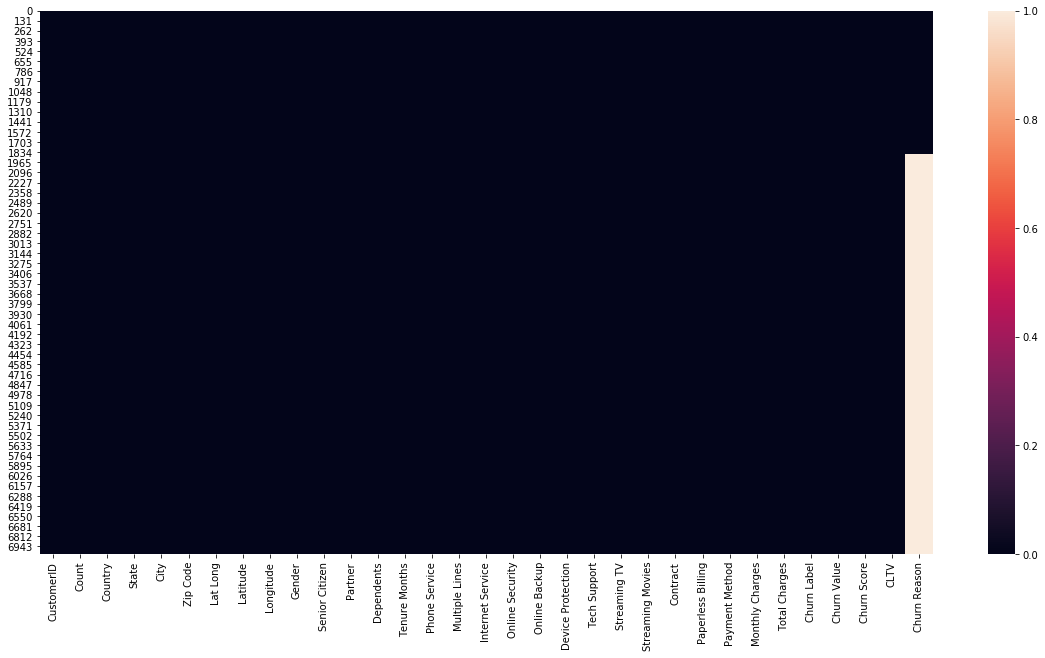

In [25]:
#missing values statistics per variable (blue:no missing values , white: a lot of missing values)
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull())

# Data preparation


During this step we are going to :
Remove the non-significant variables - Remove the outliers - Replace missing values - Encode of variables

In [26]:

dt = pd.read_excel('Telco_customer_churn.csv.xlsx')
dt = dt.drop(['Churn Reason'], axis=1)       #more than 73% of the values are missing
dt = dt.drop(['Country'], axis=1)            #represents a single value
dt = dt.drop(['State'], axis=1)              #represents a single value
dt = dt.drop(['Churn Label'], axis=1)        #Redundancy with the churn value column that encodes the churn label column
dt = dt.drop(['Latitude'], axis=1)           #Redundancy with City column
dt = dt.drop(['Longitude'], axis=1)          #Redundancy with City column
dt = dt.drop(['Lat Long'], axis=1)           #Redundancy with City column
dt = dt.drop(['Count'], axis=1)              #represents a single value
dt = dt.drop(['CustomerID'], axis=1)         #non significant Variable 
dt = dt.drop(['City'], axis=1)               #non significant Variable 
dt = dt.drop(['Zip Code'], axis=1)           #non significant Variable 
dt = dt.drop(['CLTV'], axis=1)               #non significant Variable 
dt = dt.drop(['Paperless Billing'], axis=1)  #non significant Variable 
dt = dt.drop(['Payment Method'], axis=1)     #non significant Variable 
dt = dt.drop(['Churn Score'], axis=1)     #non significant Variable 



In [27]:
#After the elimination of the non-significant variables 
dt.shape


(7043, 18)

In [28]:
dt.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,103.70,5036.3,1


In [29]:
# replacing all the blank values with NaN 
df_clean = dt.replace(r'^\s*$', np.nan, regex=True)

# print missing values
print("Missing values (per feature): \n{}\n".format(df_clean.isnull().sum()))

Missing values (per feature): 
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Monthly Charges       0
Total Charges        11
Churn Value           0
dtype: int64



In [30]:
import statistics

x = statistics.mean(dt['Total Charges'])


In [31]:
#x=2283.3004408418656
# x is the mean of total charges

dt.replace([' ',x])  #nous avons rempalcé les valeurs manquantes par x (the mean)


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,103.70,5036.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,21.15,1419.4,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,0
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0


In [32]:
print("Missing values (per feature): \n{}\n".format(dt.isnull().sum()))


#on n'a plus des val manquantes

Missing values (per feature): 
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Monthly Charges      0
Total Charges        0
Churn Value          0
dtype: int64



In [34]:
dt["Total Charges"] = pd.to_numeric(dt["Total Charges"])


In [35]:
#belong to data understanding:

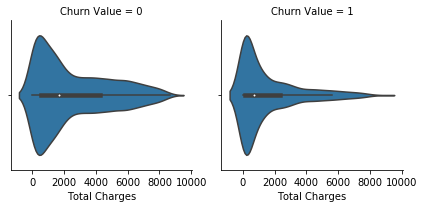

In [36]:
sns.FacetGrid(dt, col='Churn Value').map(sns.violinplot, 'Total Charges', order=[0,1])

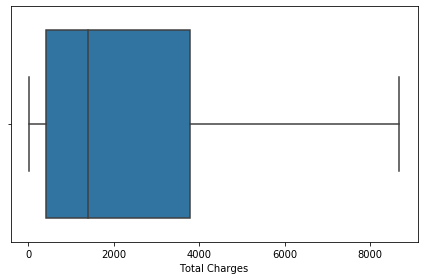

In [37]:
sns.boxplot(dt['Total Charges'])
plt.tight_layout()

#### Observation:
#The amount of total charges does not significantly impact the churn rate. 
The distributions show no big discrepancy.

In [38]:
#categorical variable selection
obj_cols=dt.select_dtypes(include=['object']).columns.tolist()
obj_cols

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract']

In [39]:
#selection du nombre de valeurs differents pour chaque variable
dt.select_dtypes(include=['object']).nunique()

Gender               2
Senior Citizen       2
Partner              2
Dependents           2
Phone Service        2
Multiple Lines       3
Internet Service     3
Online Security      3
Online Backup        3
Device Protection    3
Tech Support         3
Streaming TV         3
Streaming Movies     3
Contract             3
dtype: int64

In [40]:
dt1 = dt.drop(obj_cols,axis='columns')
#dt1 Contient Les Variables Numerique
#dt Contients les variales categorielles 

In [41]:
#conversion des var categoriels en num
dic = {}
for col in obj_cols: 
    dic[col] = pd.get_dummies(dt[col]).iloc[:,1:]
dic['Multiple Lines'].head(3)

,No phone service,Yes
0,0,0
1,0,0
2,0,1


In [42]:
#concaténation des nouvelles variables convertis avec les variables qui sont deja num
data_set=pd.concat([dt1,dic['Gender'],
 dic['Senior Citizen'],
 dic['Partner'],
 dic['Dependents'],
 dic['Phone Service'],
 dic['Multiple Lines'],
 dic['Internet Service'],
 dic['Online Security'],
 dic['Online Backup'],
 dic['Device Protection'],
 dic['Tech Support'],
 dic['Streaming TV'],
 dic['Streaming Movies'],
 dic['Contract']], axis=1)



In [43]:
data_set.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Yes,Yes,Yes,Yes,No phone service,...,No internet service,Yes,No internet service,Yes,No internet service,Yes,No internet service,Yes,One year,Two year
0,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,70.70,151.65,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,8,99.65,820.50,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
3,28,104.80,3046.05,1,0,0,1,1,1,0,...,0,1,0,1,0,1,0,1,0,0
4,49,103.70,5036.30,1,1,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0


In [44]:
#Supression des Colonnes redandants
data_set_T=data_set.T
data_set_T=data_set_T.drop('No internet service')
data_set_T=data_set_T.drop('No phone service')
data_set_T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
Tenure Months,2.00,2.00,8.00,28.00,49.0,10.00,1.00,1.00,47.00,1.0,...,2.00,55.0,38.00,19.0,12.00,72.00,24.0,72.0,11.00,66.00
Monthly Charges,53.85,70.70,99.65,104.80,103.7,55.20,39.65,20.15,99.35,30.2,...,20.05,60.0,69.50,78.7,60.65,21.15,84.8,103.2,29.60,105.65
Total Charges,108.15,151.65,820.50,3046.05,5036.3,528.35,39.65,20.15,4749.15,30.2,...,39.25,3316.1,2625.25,1495.1,743.30,1419.40,1990.5,7362.9,346.45,6844.50
Churn Value,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.0,...,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00
Male,1.00,0.00,0.00,0.00,1.0,0.00,1.00,1.00,1.00,1.0,...,0.00,1.0,1.00,1.0,0.00,0.00,1.0,0.0,0.00,1.00
Yes,0.00,0.00,0.00,0.00,0.0,0.00,1.00,0.00,0.00,0.0,...,0.00,1.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00
Yes,0.00,0.00,0.00,1.00,0.0,1.00,0.00,0.00,1.00,1.0,...,0.00,1.0,0.00,0.0,0.00,0.00,1.0,1.0,1.00,0.00
Yes,0.00,1.00,1.00,1.00,1.0,0.00,0.00,0.00,1.00,0.0,...,0.00,0.0,0.00,0.0,0.00,0.00,1.0,1.0,1.00,0.00
Yes,1.00,1.00,1.00,1.00,1.0,1.00,0.00,1.00,1.00,0.0,...,1.00,1.0,1.00,1.0,0.00,1.00,1.0,1.0,0.00,1.00
Yes,0.00,0.00,1.00,1.00,1.0,0.00,0.00,0.00,1.00,0.0,...,0.00,1.0,0.00,0.0,0.00,0.00,1.0,1.0,0.00,0.00


In [45]:
# affichage des noms des colonnes et leur nombre
print(data_set_T.index.tolist())
len(data_set_T.index.tolist())

['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Fiber optic', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'One year', 'Two year']


20

In [46]:
rows_names=['Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value',
 'Male',
 'Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Fiber optic',
 'No internet service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'One year',
 'Two year']
len(rows_names)

20

In [47]:
data_set_T.index=rows_names
data_set_T=data_set_T.drop('No internet service')
data_set=data_set_T.T

In [50]:
data_set

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Fiber optic,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,One year,Two year
0,2.0,53.85,108.15,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,70.70,151.65,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,99.65,820.50,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,28.0,104.80,3046.05,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
4,49.0,103.70,5036.30,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72.0,21.15,1419.40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7039,24.0,84.80,1990.50,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
7040,72.0,103.20,7362.90,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
7041,11.0,29.60,346.45,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#belong to data understanding:

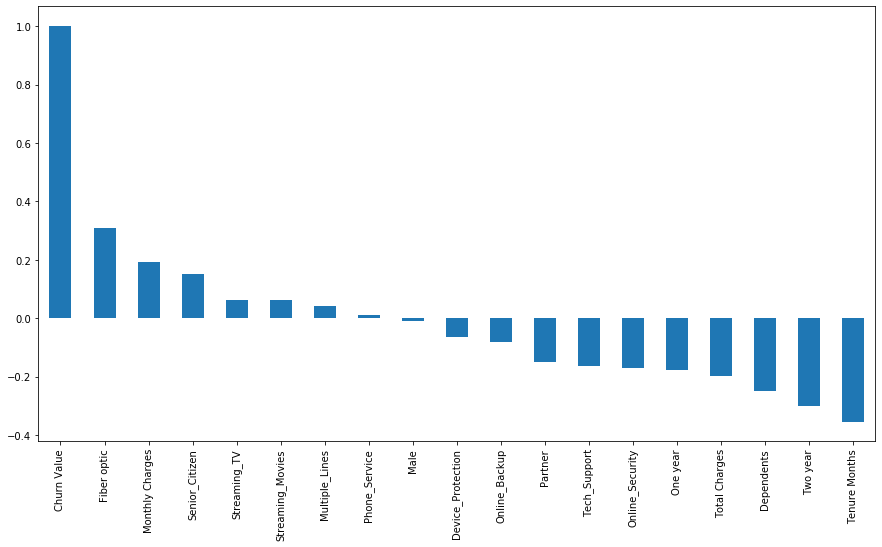

In [52]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data_set.corr()['Churn Value'].sort_values(ascending = False).plot(kind='bar')

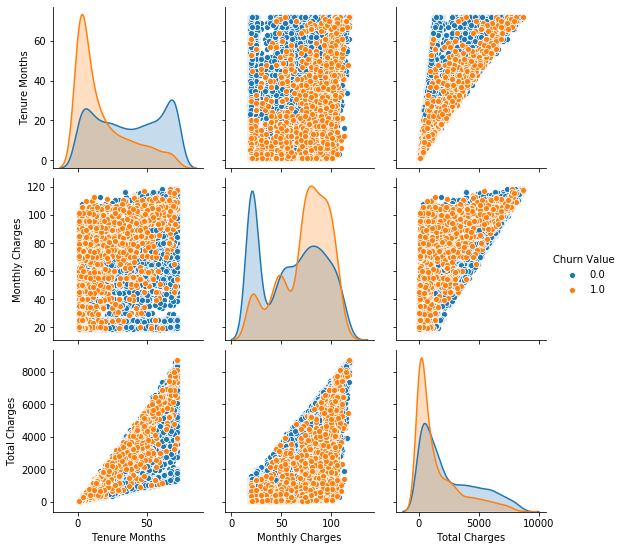

In [53]:
sns.pairplot(data_set.iloc[:,:4],hue="Churn Value")
plt.show()

#diag: rep de données
#the rest : correlation

In [ ]:
#Removal of outliers ( we can use also the algo ranked base algo) --> going to adjust variables with overfloating values
# sup des vals extremes

In [54]:
Q1 =  data_set['Monthly Charges'].quantile(0.25)
Q3 =  data_set['Monthly Charges'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
filter1 = ( data_set['Monthly Charges'] >= Q1 - 1.5 * IQR) & ( data_set['Monthly Charges'] <= Q3 + 1.5 *IQR)
data_set= data_set.loc[filter1]

In [55]:
Q1 =  data_set['Tenure Months'].quantile(0.25)
Q3 =  data_set['Tenure Months'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
filter1 = ( data_set['Tenure Months'] >= Q1 - 1.5 * IQR) & ( data_set['Tenure Months'] <= Q3 + 1.5 *IQR)
data_set= data_set.loc[filter1] 

# Correlation

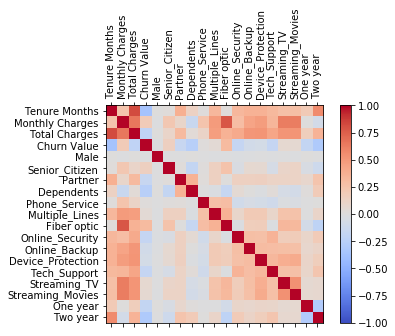

In [56]:
corr = data_set.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_set.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_set.columns)
ax.set_yticklabels(data_set.columns)
plt.show()

### Pearson's correlation coefficient


In [57]:
#3-Pearson Correlation Coefficient
#np.seterr(divide='ignore', invalid='ignore')
def histogram_intersection(x, y):
    v = np.corrcoef(x, y)
    return v[0, 1]
cor_matrix = data_set.corr(method=histogram_intersection)
cor_matrix<-0.8
abs(cor_matrix)>0.8
#correlation entre 2 var :
#    ~ 1  : les var sont correlées ==> il existe une relation linéaire entre les 2 var
#    ~ -1 : les var sont correlées inversement ==> il existe une relation linéaire entre les 2 var
#    ~ 0  : pas de correlation ==> pas de relation linaire
#-> toutes les variables ne sont pas forcément corrolées




#les doneés sont normlemnt distribués

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Male,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Fiber optic,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,One year,Two year
Tenure Months,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Monthly Charges,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Total Charges,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Churn Value,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Male,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Senior_Citizen,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
Partner,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
Dependents,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
Phone_Service,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
Multiple_Lines,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


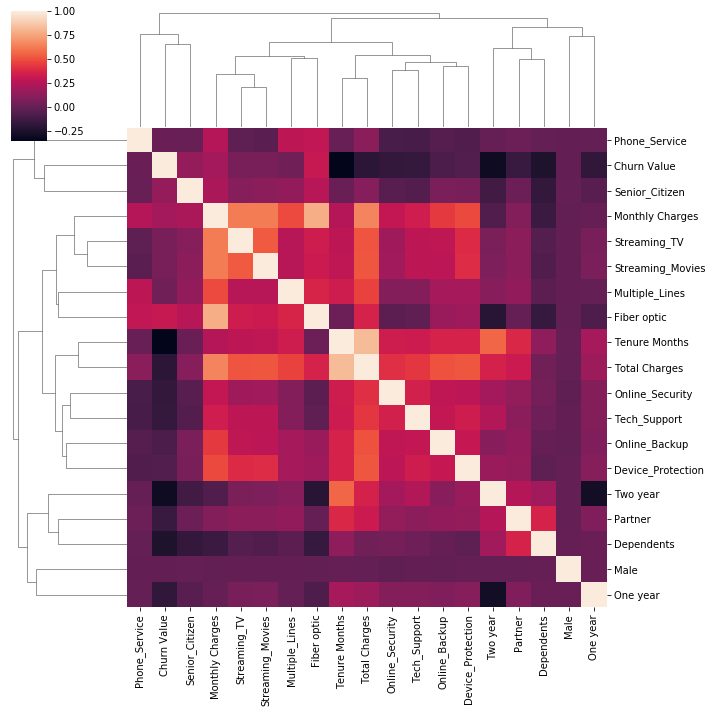

In [58]:
sns.clustermap(data_set.corr())

In [59]:
def plot_top_bottom_rank_correlation(my_df, column_target, top_rank=5, title=''):
    corr_matrix = my_df.corr()
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7), sharex=False)
    if(title):
        f.suptitle(title)

    ax1.set_title('Top {} Positive Corr to {}'.format(top_rank, column_target))
    ax2.set_title('Top {} Negative Corr to {}'.format(top_rank, column_target))
    
    cols_top = corr_matrix.nlargest(top_rank+1, column_target)[column_target].index
    cm = np.corrcoef(my_df[cols_top].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 11}, yticklabels=cols_top.values,
                     xticklabels=cols_top.values, mask=mask, ax=ax1)
    
    cols_bot = corr_matrix.nsmallest(top_rank, column_target)[column_target].index
    cols_bot  = cols_bot.insert(0, column_target)
    cm = np.corrcoef(my_df[cols_bot].values.T)
    mask = np.zeros_like(cm)
    mask[np.triu_indices_from(mask)] = True
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',
                     annot_kws={'size': 11}, yticklabels=cols_bot.values,
                     xticklabels=cols_bot.values, mask=mask, ax=ax2)
    
    plt.show()

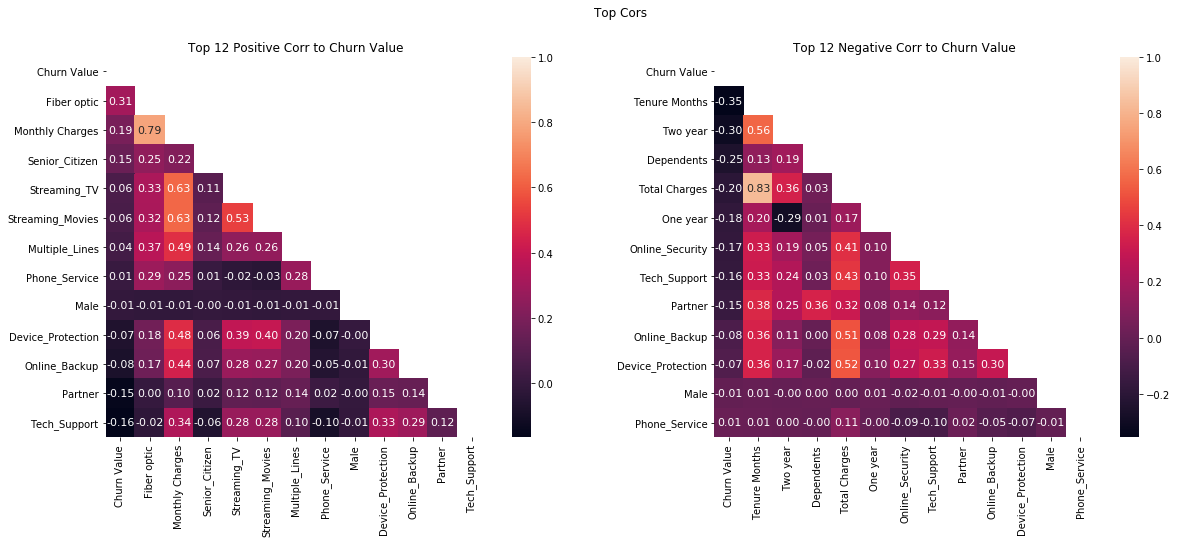

In [60]:
abc = plot_top_bottom_rank_correlation(data_set, 'Churn Value', top_rank=12, title='Top Cors')


# Data treatment

In [61]:
#échantillonnage aléatoire
X =  data_set.drop(['Churn Value'], axis=1)
y = data_set['Churn Value']

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
ros.fit(X,y)
X_over_sampled,y_over_sampled = ros.fit_resample(X,y)

#assurer un équilibre entre les classes
from imblearn.under_sampling import ClusterCentroids

clusters = ClusterCentroids(sampling_strategy='auto',random_state = 1)
clusters.fit(X,y)
X_cluster_sampled,y_cluster_sampled = clusters.fit_resample(X,y)

C:\Users\MSI GF63\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\MSI GF63\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\MSI GF63\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=Fut

In [62]:
#Diviser les données (70% Train  et 30% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_over_sampled, y_over_sampled, test_size = 0.3, random_state = 0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_cluster_sampled, y_cluster_sampled, test_size = 0.3, random_state = 0)

In [63]:
#Standardisation pour changer les valeurs des données à une échelle commune
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X1_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(X1_test)

# EDA : Exploratory Data Analysis 

An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.Once EDA is complete and insights are drawn, its feature can be used for supervised and unsupervised machine learning modelling

In [64]:
def eda_numerical_feat(series, title="", with_label=True, number_format="", show_describe=False, size_labels=10):
    # Use 'series_remove_outiliers' to filter outiliers
    """ Generate series.describe(), bosplot and displot to a series
    @with_label: show labels in boxplot
    @number_format: 
        integer: 
            '{:d}'.format(42) => '42'
            '{:,d}'.format(12855787591251) => '12,855,787,591,251'
        float:
            '{:.0f}'.format(91.00000) => '91' # no decimal places
            '{:.2f}'.format(42.7668)  => '42.77' # two decimal places and round
            '{:,.4f}'.format(1285591251.78) => '1,285,591,251.7800'
            '{:.2%}'.format(0.09) => '9.00%' # Percentage Format
        string:
            ab = '$ {:,.4f}'.format(651.78) => '$ 651.7800'
    def swap(string, v1, v2):
        return string.replace(v1, "!").replace(v2, v1).replace('!',v2)
    # Using
        swap(ab, ',', '.')
    """
    f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 5), sharex=False)
    if(show_describe):
        print(series.describe())
    if(title != ""):
        f.suptitle(title, fontsize=18)
    sns.distplot(series, ax=ax1)
    sns.boxplot(series, ax=ax2)
    if(with_label):
        describe = series.describe()
        labels = { 'min': describe.loc['min'], 'max': describe.loc['max'], 
              'Q1': describe.loc['25%'], 'Q2': describe.loc['50%'],
              'Q3': describe.loc['75%']}
        if(number_format != ""):
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + number_format.format(v), ha='center', va='center', fontweight='bold',
                         size=size_labels, color='white', bbox=dict(facecolor='#445A64'))
        else:
            for k, v in labels.items():
                ax2.text(v, 0.3, k + "\n" + str(v), ha='center', va='center', fontweight='bold',
                     size=size_labels, color='white', bbox=dict(facecolor='#445A64'))
    plt.show()

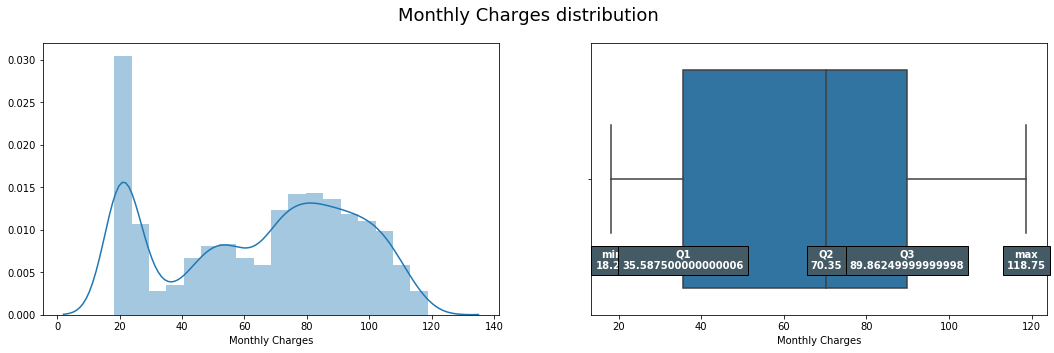

In [73]:
eda_numerical_feat(data_set['Monthly Charges'], title="Monthly Charges distribution")
# on achoisit monthly charges car elle est signifiante

In [74]:
def eda_categ_feat_desc_plot(series_categorical, title = "", fix_labels=False):
    """Generate 2 plots: barplot with quantity and pieplot with percentage. 
       @series_categorical: categorical series
       @title: optional
       @fix_labels: The labes plot in barplot in sorted by values, some times its bugs cuz axis ticks is alphabethic
           if this happens, pass True in fix_labels
       @bar_format: pass {:,.0f} to int
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)

    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    if(fix_labels):
        val_concat = val_concat.sort_values(series_name).reset_index()
    
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], '{:,d}'.format(int(row['quantity'])), color='black', ha="center")

    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot")

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

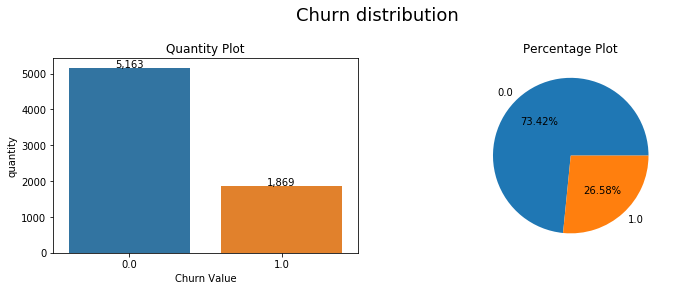

In [75]:
eda_categ_feat_desc_plot(data_set['Churn Value'], title = "Churn distribution")


In [76]:
#Seperate the churn and non churn customer
churn = data_set[data_set["Churn Value"] == "Yes"]
not_churn = data_set[data_set["Churn Value"] == "No"]
#Seperating categorical and numerical data
Id = ['customerID']
target_col = ['Churn']
cat_cols   = data_set.nunique()
cat_cols   = data_set.nunique()[data_set.nunique() < 6].keys().tolist()
cat_cols = [x for x in cat_cols if x not in target_col]
num_cols = [x for x in data_set.columns if x not in cat_cols + target_col + Id]


In [77]:
# 1 chrurner #0 no 

#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization


#labels
label = data_set["Churn Value"].value_counts().keys().tolist()
label
#values
val = data_set["Churn Value"].value_counts().values.tolist()
val


trace = go.Pie(labels = label ,
               values = val ,
               marker = dict(colors =  [ 'DarkSeaGreen' ,'DarkSalmon'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 70,
               hoverinfo = "label+value+text",
               hole = 0.5
              )

layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

#  MODELING  


In [78]:
sum_met = pd.DataFrame(index = ['accuracy'], columns = [ 'Naive_Bayes','Decision_Tree','SVM', 'Logistic_Regression', 'Random_Forest',])

### NAIVE BAYES

Soit  X tuple d’un échantillon de données dont le label de la classe est inconnu et soit  H l’hypothèse que  X appartienne à la classe C.
La classification consiste à déterminer  P(H|X), la probabilité que l'hypothèse soit vérifiée étant  donné le tuple X

In [79]:
# gaussien car il est plus simple

from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
# Predicting the Test set results
y_pred_nv = classifier.predict(X_test)

In [81]:
# Making the Confusion Matrix and Classification report
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_nv)


# Printing the results
print('Confusion matrix:\n',cm)
print('\n','Classification report:\n\n',classification_report(y_test, y_pred_nv))

Confusion matrix:
 [[1041  481]
 [ 317 1259]]

 Classification report:

               precision    recall  f1-score   support

         0.0       0.77      0.68      0.72      1522
         1.0       0.72      0.80      0.76      1576

    accuracy                           0.74      3098
   macro avg       0.75      0.74      0.74      3098
weighted avg       0.74      0.74      0.74      3098



Text(91.68, 0.5, 'predicted label')

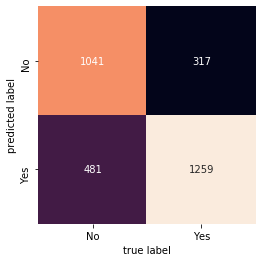

In [82]:
#Confusion Matrix
mat_nv = confusion_matrix(y_test, y_pred_nv)
sns.heatmap(mat_nv.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [83]:
# Saving the accuracy for NV
cl = classification_report(y_test,   y_pred_nv)
list_of_words = cl.split()
sum_met.at['accuracy','Naive_Bayes'] = list_of_words[list_of_words.index('accuracy') + 1]

### Decision Tree Classifier

Commençant par  un nœud racine S qui contient l'ensemble de données complet.Après avoir trouvez le meilleur attribut dans l'ensemble de données et diviser le S en sous-ensembles contenant valeurs possibles pour les meilleurs attributs.on Génér le nœud de l'arbre de décision, qui contient le meilleur attribut.Par la suite on Crée de manière récursive de nouveaux arbres de décision et ainsi de suite


In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
dta = DecisionTreeClassifier(random_state=0)

In [86]:
dta.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [87]:
print('Le train score est :', dta.score(X_train, y_train))
print('Le test score est :', dta.score(X_test, y_test))

Le train score est : 0.9961261759822911
Le test score est : 0.8637830858618464


In [88]:
y_test.shape

(3098,)

In [89]:
from sklearn.metrics import confusion_matrix
y_pred = dta.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1224  298]
 [ 124 1452]]


Text(91.68, 0.5, 'predicted label')

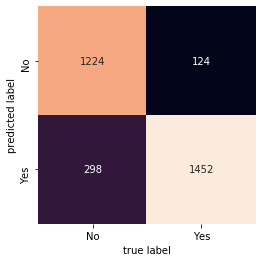

In [90]:
#Confusion Matrix
mat_nv = confusion_matrix(y_test, y_pred)
sns.heatmap(mat_nv.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [91]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred, digits=8 ))

              precision    recall  f1-score   support

         0.0  0.90801187 0.80420499 0.85296167      1522
         1.0  0.82971429 0.92131980 0.87312087      1576

    accuracy                      0.86378309      3098
   macro avg  0.86886308 0.86276240 0.86304127      3098
weighted avg  0.86818069 0.86378309 0.86321696      3098



In [92]:
dta.feature_importances_
#pour mesurer limportance des variables

array([0.09651395, 0.20339194, 0.17626857, 0.0278995 , 0.01638738,
       0.03254395, 0.04717462, 0.00339279, 0.01287593, 0.04056352,
       0.01687705, 0.01790152, 0.02388558, 0.0160591 , 0.01101184,
       0.00558082, 0.09017053, 0.16150141])

In [93]:
data_set.columns

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Male', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Fiber optic', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'One year', 'Two year'],
      dtype='object')

In [94]:
names = ['Tenure Months', 'Monthly Charges', 'Total Charges',
       'Male', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Fiber optic', 'No internet service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'One year']

In [95]:
for var, importance in zip(names, dta.feature_importances_):
    if importance != 0:
        print(var, importance)

Tenure Months 0.09651394870647927
Monthly Charges 0.2033919353392504
Total Charges 0.17626856778711797
Male 0.02789949680190616
Senior_Citizen 0.01638738482089426
Partner 0.03254395491392022
Dependents 0.04717462171743686
Phone_Service 0.0033927944693266884
Multiple_Lines 0.012875934948652771
Fiber optic 0.040563517617344835
No internet service 0.016877050682763347
Online_Security 0.017901520736188205
Online_Backup 0.02388558390323622
Device_Protection 0.016059098342079012
Tech_Support 0.011011836761909876
Streaming_TV 0.00558081825374564
Streaming_Movies 0.0901705271907183
One year 0.16150140700702992


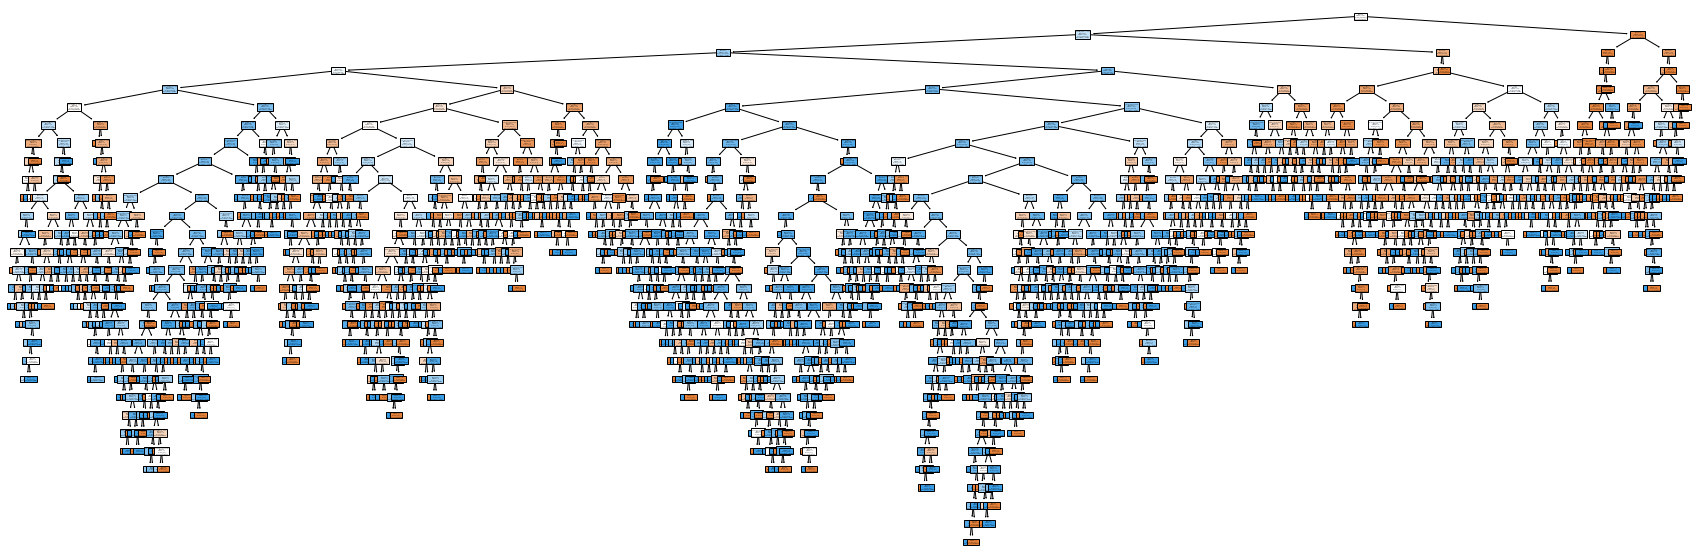

In [96]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plot_tree(dta, feature_names= names, class_names=data_set.columns, filled=True)
plt.show()

In [97]:
from sklearn.tree import export_text

In [98]:
print(export_text(dta, feature_names=names))

|--- One year <= 0.94
|   |--- Streaming_Movies <= 0.96
|   |   |--- Fiber optic <= -0.12
|   |   |   |--- Tenure Months <= -1.06
|   |   |   |   |--- Monthly Charges <= -1.94
|   |   |   |   |   |--- Total Charges <= -1.03
|   |   |   |   |   |   |--- Monthly Charges <= -2.00
|   |   |   |   |   |   |   |--- Monthly Charges <= -2.00
|   |   |   |   |   |   |   |   |--- Total Charges <= -1.04
|   |   |   |   |   |   |   |   |   |--- Male <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Male >  0.01
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Total Charges >  -1.04
|   |   |   |   |   |   |   |   |   |--- Male <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- Male >  0.01
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Monthly Charges >  -2.00
|   |   |   |   |   |   |   |   |--- class: 0.

In [99]:
data=data_set.drop(['Churn Value'], axis=1)

In [100]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(1,10)}

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)

In [103]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8,

In [104]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [105]:
final_model = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=9)

In [106]:
final_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [107]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))

le train_score= 0.8454620918649696
le test_score= 0.7930923176242737


Text(91.68, 0.5, 'predicted label')

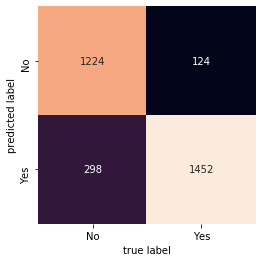

In [108]:
#Confusion Matrix
mat_nv = confusion_matrix(y_test, y_pred)
sns.heatmap(mat_nv.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [109]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred ))

              precision    recall  f1-score   support

         0.0       0.84      0.72      0.77      1522
         1.0       0.76      0.86      0.81      1576

    accuracy                           0.79      3098
   macro avg       0.80      0.79      0.79      3098
weighted avg       0.80      0.79      0.79      3098



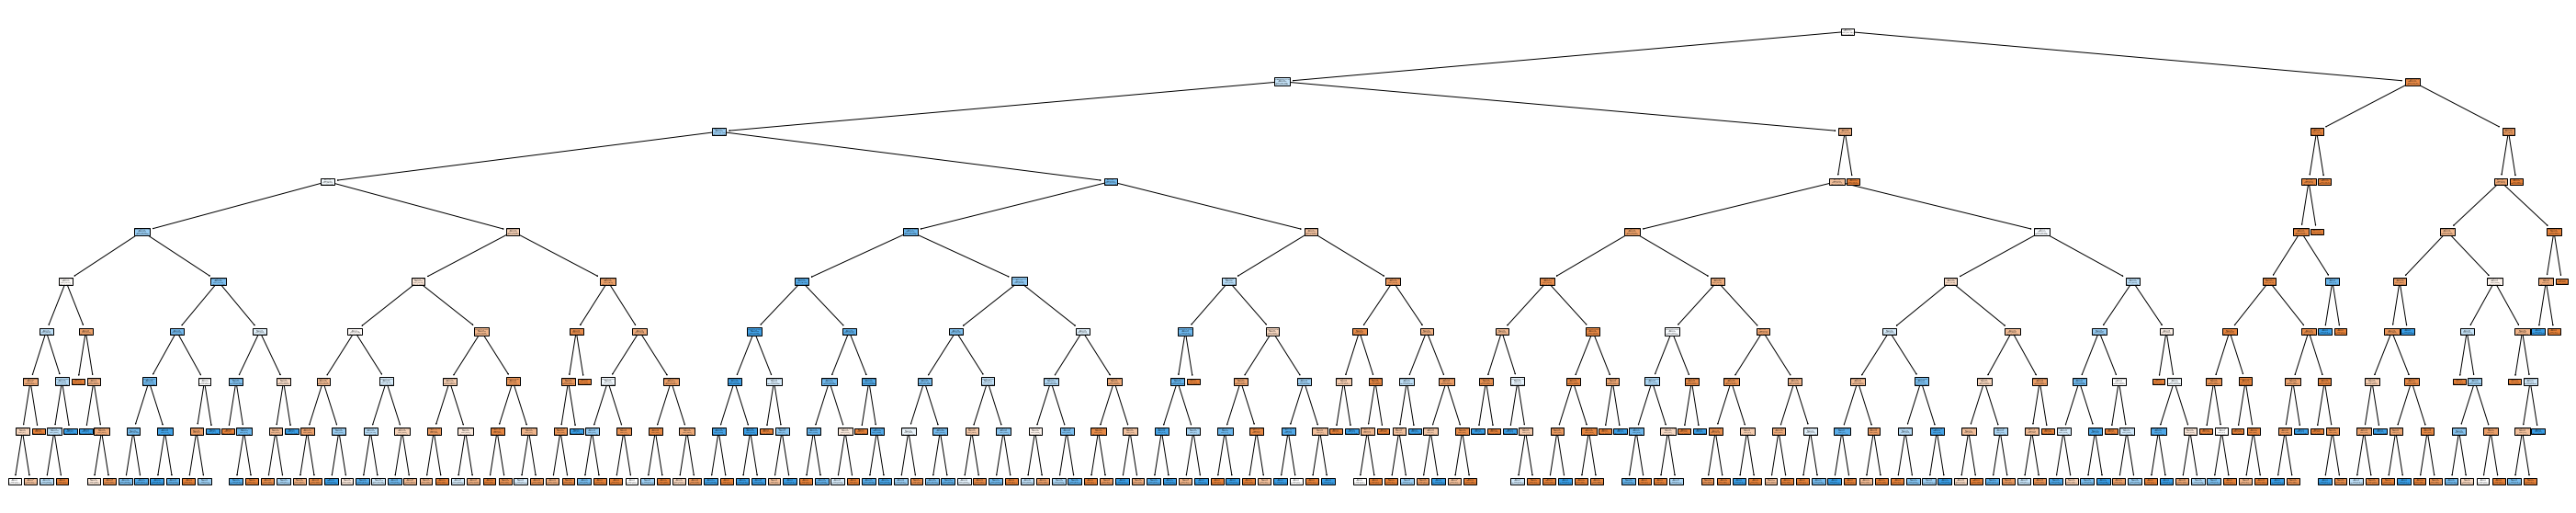

In [110]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50,10))
plot_tree(final_model, feature_names= names, class_names=data.columns, filled=True)
plt.show()

In [111]:
final_model.feature_importances_

array([0.08007448, 0.13564365, 0.0943916 , 0.00695173, 0.00270254,
       0.02378352, 0.08191051, 0.0011835 , 0.00517494, 0.07110179,
       0.00925345, 0.01168364, 0.00350749, 0.01449989, 0.00668721,
       0.00288883, 0.16071319, 0.28784801])

In [112]:
from sklearn.tree import export_text
print(export_text(final_model, feature_names=names))

|--- One year <= 0.94
|   |--- Streaming_Movies <= 0.96
|   |   |--- Fiber optic <= -0.12
|   |   |   |--- Tenure Months <= -1.06
|   |   |   |   |--- Monthly Charges <= -1.94
|   |   |   |   |   |--- Total Charges <= -1.03
|   |   |   |   |   |   |--- Monthly Charges <= -2.00
|   |   |   |   |   |   |   |--- Monthly Charges <= -2.00
|   |   |   |   |   |   |   |   |--- Total Charges <= -1.04
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- Total Charges >  -1.04
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Monthly Charges >  -2.00
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Monthly Charges >  -2.00
|   |   |   |   |   |   |   |--- Senior_Citizen <= 0.85
|   |   |   |   |   |   |   |   |--- Monthly Charges <= -1.94
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Monthly Charges >  -1.94
|   |   |   |   |   |   |   |   |   |--- class: 

In [113]:
# Saving the accuracy for Decision Tree
cl = classification_report(y_test,   y_pred)
list_of_words = cl.split()
sum_met.at['accuracy','Decision_Tree'] = list_of_words[list_of_words.index('accuracy') + 1]

### SVM

il va calculer une droite pour bien diviser les point en deux groupe afin que les futures points peuvent être classés 

Text(0, 0.5, 'Erreur')

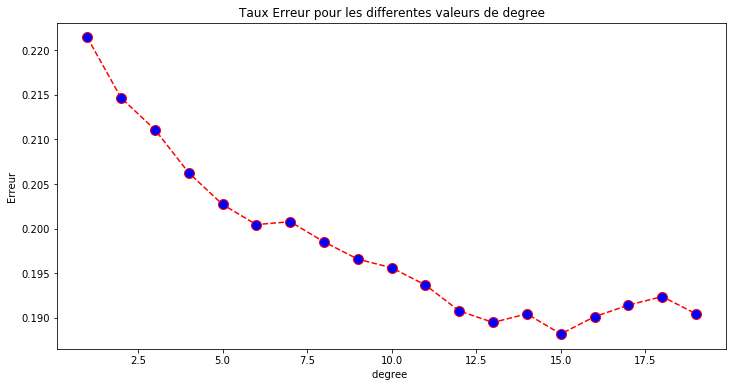

In [114]:
#taux Erreur pour les differentes valeurs de degree
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


error = []
train_accuracy = []
test_accuracy = []

#c : Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty
for i in range(1, 20):
    svm = SVC(C=i,random_state=0)
    svm_model = svm.fit(X_train, y_train)
    pred_i = svm_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    train_accuracy.append(accuracy_score(y_train, svm_model.predict(X_train) ))
    test_accuracy.append(accuracy_score(y_test, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
#plt.plot(range(1, 20), train_accuracy, color='green', linestyle='dashed', marker='o',
#         markerfacecolor='blue', markersize=10)
#plt.plot(range(1, 20), test_accuracy, color='yellow', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de degree')
plt.xlabel('degree ')
plt.ylabel('Erreur')

In [115]:
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC

In [116]:
svm_classifier= SVC(probability=True)
svm_classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [117]:
#Predict
y_pred_svm= svm_classifier.predict(X_test)
#Classification Report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1522
         1.0       0.76      0.82      0.79      1576

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



Text(91.68, 0.5, 'predicted label')

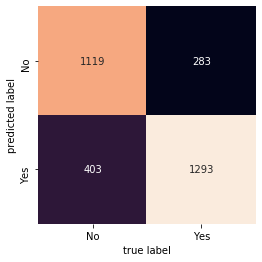

In [118]:
#Confusion Matrix
mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat_svm.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

SVM results is a little better than Random Forest. But not a huge improvement

Finally will draw ROC Curve for this mode

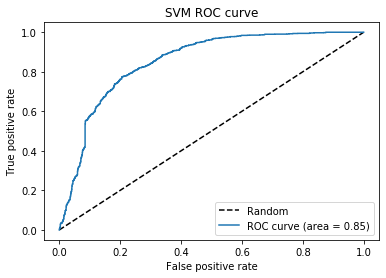

In [119]:
y_pred_svm_proba=svm_classifier.predict_proba(X_test)[:,1]
#ROC Curve
fpr_svm, tpr_svm, _svm = roc_curve(y_test, y_pred_svm_proba)
roc_auc=auc(fpr_svm,tpr_svm)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr_svm,tpr_svm,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc='best')

In [120]:
# Saving the accuracy for SVM
cl = classification_report(y_test,   y_pred_svm)
list_of_words = cl.split()
sum_met.at['accuracy','SVM'] = list_of_words[list_of_words.index('accuracy') + 1]

### Logistic Regression

 Il est utilisé lorsque les variables sont binaires dans la nature. Il apprend une relation linéaire à partir de l'ensemble de données fournies, puis introduit un non-linéarité sous la forme de la fonction sigmoïde.


In [121]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

In [122]:
lr = LogisticRegression()
xgb = XGBClassifier()

In [123]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train, y_train)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.8355143490946105 for {'C': 0.001, 'solver': 'liblinear'}


In [124]:
model_lr = LogisticRegression(solver='newton-cg', C=0.001)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
lr_corr = confusion_matrix(y_test, y_pred_lr, normalize='true')
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75      1522
         1.0       0.74      0.82      0.78      1576

    accuracy                           0.76      3098
   macro avg       0.77      0.76      0.76      3098
weighted avg       0.77      0.76      0.76      3098



Text(91.68, 0.5, 'predicted label')

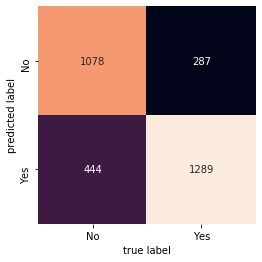

In [125]:
#Confusion Matrix
mat_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(mat_lr.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [126]:
# Saving the accuracy for Logistic Regression
cl = classification_report(y_test,   y_pred_lr)
list_of_words = cl.split()
sum_met.at['accuracy','Logistic_Regression'] = list_of_words[list_of_words.index('accuracy') + 1]

### Random Forest

1- création de sous ensemble aléatoire avec n caractéristiques

2- il utilise les n caractéristiques pour trouver le meilleur nœud racine par la division.

3- Séparation du nœud en nœuds filles 

4- et on répète jusqu'à avoir une forêt 
  
  
il va creer des arbres de facon aleatoire et au final il va prendre la decision majoritaire 

Text(0, 0.5, 'Exactitude')

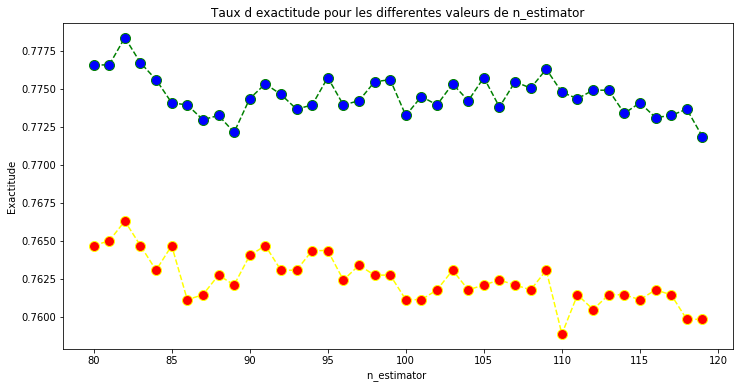

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

error = []
train_accuracy = []
test_accuracy = []

for i in range(80, 120):
    rf = RandomForestClassifier(n_estimators=i,max_depth=2, random_state=0)
    rf_model = rf.fit(X_train, y_train)
    pred_i = rf_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    train_accuracy.append(accuracy_score(y_train, rf_model.predict(X_train) ))
    test_accuracy.append(accuracy_score(y_test, pred_i))
plt.figure(figsize=(12, 6))
#plt.plot(range(80, 120), error, color='red', linestyle='dashed', marker='o',
#         markerfacecolor='blue', markersize=10)
plt.plot(range(80, 120), train_accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(80, 120), test_accuracy, color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Taux d exactitude pour les differentes valeurs de n_estimator')
plt.xlabel('n_estimator ')
plt.ylabel('Exactitude')


#n: nb d'arbres generé
#blue:train
#red:test

In [128]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve , auc


Random Forest Model

Will start by train Random forest model using default parameters and all variables and get initial results

In [129]:
#Apply RandomForest Algorethm
random_classifier= RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [130]:
y_pred_rf= random_classifier.predict(X_test)

In [131]:
#Classification Report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.82      0.87      1522
         1.0       0.84      0.94      0.89      1576

    accuracy                           0.88      3098
   macro avg       0.89      0.88      0.88      3098
weighted avg       0.89      0.88      0.88      3098



Text(91.68, 0.5, 'predicted label')

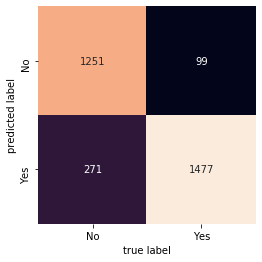

In [132]:
#Confusion Matrix
mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [133]:
# Saving the accuracy for Random Forest
cl = classification_report(y_test,  y_pred_rf)
list_of_words = cl.split()
sum_met.at['accuracy','Random_Forest'] = list_of_words[list_of_words.index('accuracy') + 1]

### KNN

il calcule la distance de entre les points les plus proches et il intègre le groupe de point majoritaire

Text(0, 0.5, 'Erreur')

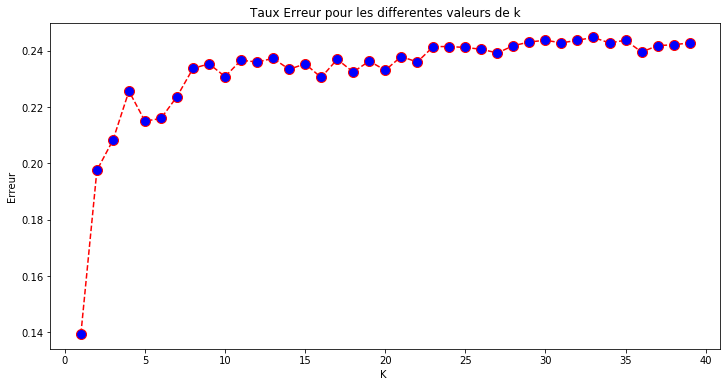

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

error = []
score = []
train_accuracy = []
test_accuracy = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
# Tester k de 1 à 40 et la distance Manhattan
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    score.append(knn.score(X_test,y_test))
    train_accuracy.append(accuracy_score(y_train, knn_model.predict(X_train) ))
    test_accuracy.append(accuracy_score(y_test, pred_i))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Erreur')

# interpretation des pts apartir de k=20 on remarque sur les 3 figs que les pts sont presque cnsts d'ou on deduit le meilleur 
# param pour note modèle

Text(0, 0.5, 'Score')

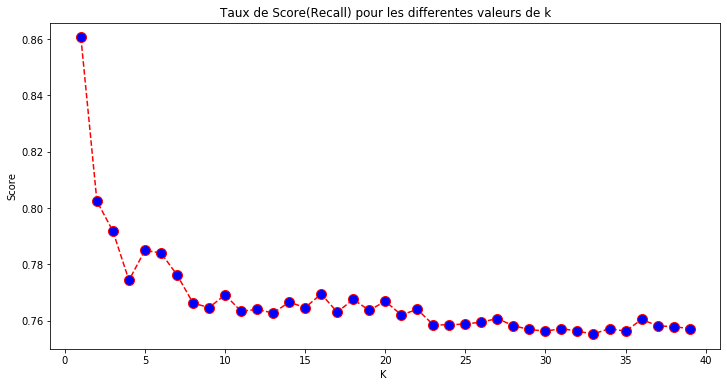

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), score, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux de Score(Recall) pour les differentes valeurs de k')
plt.xlabel('K ')
plt.ylabel('Score')

Text(0, 0.5, 'Score')

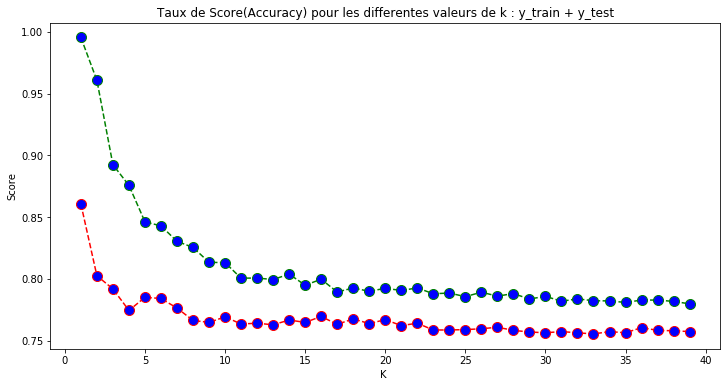

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), train_accuracy, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.plot(range(1, 40), test_accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux de Score(Accuracy) pour les differentes valeurs de k : y_train + y_test')
plt.xlabel('K ')
plt.ylabel('Score')

In [137]:

#trouver les meilleurs parametres en utilisant GridSearch
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,20))# Par défaut c'est 30
n_neighbors = list(range(1,25))
p=[1,2] #p = 1 manhattan_distance/p=2 euclidean_distance
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
#n_jobs: number of CPU'sfor execution.
#cv: number of folds of the cross validation

#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 4
Best p: 1
Best n_neighbors: 1


In [138]:
# Afficher les paramètres qui donnent les meilleurs performances
best_parameters = clf.best_params_
print(best_parameters)

{'leaf_size': 4, 'n_neighbors': 1, 'p': 1}


In [139]:
#Entrainer le modèle dt sur les sous-ensembles d'apprentissage avec les meilleurs parametres (observations et classes)
knn = KNeighborsClassifier(23,p=2,leaf_size=1 )
knn_model = knn.fit(X_train, y_train)

In [140]:
#Calculer les scores d'apprentissage et de test relatifs au modèle 
ktrain='{:.3f}'.format(knn.score(X_train, y_train))
ktest='{:.3f}'.format(knn.score(X_test, y_test))
print('Accuracy of K-NN classifier on training set:',ktrain)
print('Accuracy of K-NN classifier on test set:',ktest)

Accuracy of K-NN classifier on training set: 0.785
Accuracy of K-NN classifier on test set: 0.760


Text(91.68, 0.5, 'predicted label')

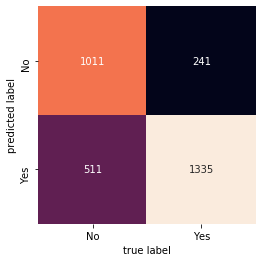

In [141]:
#Confusion Matrix
mat_rf = confusion_matrix(y_test, pred_i)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [142]:
#Afficher le classification_report de dt
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_i))

              precision    recall  f1-score   support

         0.0       0.81      0.66      0.73      1522
         1.0       0.72      0.85      0.78      1576

    accuracy                           0.76      3098
   macro avg       0.77      0.76      0.75      3098
weighted avg       0.76      0.76      0.76      3098



In [143]:
# Saving the accuracy for KNN
cl = classification_report(y_test,pred_i)
list_of_words = cl.split()
sum_met.at['accuracy','KNN'] = list_of_words[list_of_words.index('accuracy') + 1]

### ANN

il modifie les poids synaptiques. Le but  est de permettre 
au réseau de neurones d'« apprendre » à partir des exemples. Si l’entraînement
 est correctement réalisé, le réseau est capable de fournir des réponses en 
sortie très proches des valeurs d’origine .


In [144]:
#Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


ANN Model

Lastly, will build Artificial Neural Network (ANN) Model which theoretically should bring best result. Will build 2 Hidden Layers with 12 Nodes , Using Variate Function , and Output layer with one Node using Sigmoid Function. Will not run Cross Validation as a first run and will use Adam as optimizer with 100 epochs

In [145]:
#Initiate ANN Classifier
ann_classifier= Sequential()
X.shape

(7032, 18)

In [146]:
#Adding Hidden Layer1
ann_classifier.add(Dense(12,activation='relu',kernel_initializer='uniform',input_dim=18))
#Adding Hidden Layer2
ann_classifier.add(Dense(12,activation='relu',kernel_initializer='uniform'))
#Adding output Layer
ann_classifier.add(Dense(1,activation='sigmoid',kernel_initializer='uniform'))
#Compile them Model
ann_classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [147]:
ann_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                228       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 397
Trainable params: 397
Non-trainable params: 0
_________________________________________________________________


In [148]:
%time ann_classifier.fit(X_train,y_train,batch_size=10,epochs=100)


Epoch 1/100
7228/7228 [==============================] - 2s 220us/step - loss: 0.5228 - accuracy: 0.7532
Epoch 2/100
7228/7228 [==============================] - 1s 73us/step - loss: 0.4688 - accuracy: 0.7720
Epoch 3/100
7228/7228 [==============================] - 0s 66us/step - loss: 0.4641 - accuracy: 0.7761
Epoch 4/100
7228/7228 [==============================] - 0s 66us/step - loss: 0.4609 - accuracy: 0.7774
Epoch 5/100
7228/7228 [==============================] - 0s 67us/step - loss: 0.4587 - accuracy: 0.7802
Epoch 6/100
7228/7228 [==============================] - 0s 67us/step - loss: 0.4557 - accuracy: 0.7784
Epoch 7/100
7228/7228 [==============================] - 0s 66us/step - loss: 0.4531 - accuracy: 0.7814
Epoch 8/100
7228/7228 [==============================] - 0s 66us/step - loss: 0.4509 - accuracy: 0.7828
Epoch 9/100
7228/7228 [==============================] - 0s 67us/step - loss: 0.4496 - accuracy: 0.7858
Epoch 10/100
7228/7228 [==============================] - 0s 6

In [149]:
#Get Prediction Proba
y_pred_ann_proba= ann_classifier.predict(X_test)

In [150]:
#Convert Prediction to Int
y_pred_ann= (y_pred_ann_proba>.5).astype('int')

In [151]:
#Priint Classification Report
print(classification_report(y_test,y_pred_ann))

              precision    recall  f1-score   support

         0.0       0.78      0.73      0.76      1522
         1.0       0.76      0.80      0.78      1576

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.77      0.77      0.77      3098



Text(91.68, 0.5, 'predicted label')

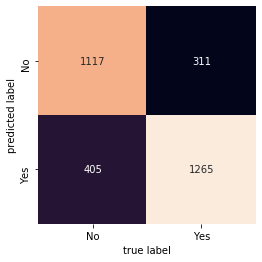

In [152]:
#Confusion Matrix
mat_rf = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

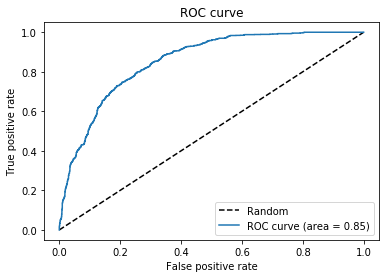

In [153]:
#Roc Curve
fpr_ann,tpr_ann,_ann=roc_curve(y_test,y_pred_ann_proba)
roc_auc=auc(fpr_ann,tpr_ann)
#Now Draw ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr_ann,tpr_ann,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')

In [154]:
# Saving the accuracy for ANN
cl = classification_report(y_test,  y_pred_ann)
list_of_words = cl.split()
sum_met.at['accuracy','ANN'] = list_of_words[list_of_words.index('accuracy') + 1]

### DECISION TREE Preparation

Decision Tree implementations differ primarily along these axes:

the splitting criterion (i.e., how "variance" is calculated)

whether it builds models for regression (continuous variables, e.g., a score) as well as classification (discrete variables, e.g., a class label)

technique to eliminate/reduce over-fitting

whether it can handle incomplete data

In [164]:
data_set.keys()

Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Male', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Fiber optic', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'One year', 'Two year'],
      dtype='object')

* We are going to swap column 4 with the last column because our algorithms that we will be working with require 
* the column 'Churn Value' as 'Decision' column, and at the last position

In [165]:
col_titles=['Tenure Months', 'Monthly Charges', 'Total Charges',
       'Male', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Fiber optic', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'One year', 'Two year', 'Churn Value']

In [166]:
#So here the new shape of our dataset after swaping the columns. We created a new excel dataset 
data_set_reorder=data_set.reindex(columns=col_titles)
data_set_reorder.to_excel('Telco_customer_churn_reorder.csv.xlsx', index=False)
data_set_reorder.head(5)

,Tenure Months,Monthly Charges,Total Charges,Male,Senior_Citizen,Partner,Dependents,Phone_Service,Multiple_Lines,Fiber optic,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,One year,Two year,Churn Value
0,2.0,53.85,108.15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,70.70,151.65,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8.0,99.65,820.50,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
3,28.0,104.80,3046.05,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
4,49.0,103.70,5036.30,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [167]:
from chefboost import Chefboost as cb 

In [168]:
data_set_reorder.columns=['Tenure Months', 'Monthly Charges', 'Total Charges',
       'Male', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service',
       'Multiple_Lines', 'Fiber optic', 'Online_Security', 'Online_Backup',
       'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies',
       'One year', 'Two year', 'Decision'] 

### REGRESSION ALGORITHM

Regression algorithm built the regression tree and revealed a lot of accuracy metrics

L’algorithme de régression figure également parmi les algorithmes d’arbre de décision.
L’arbre de régression est construit via un processus de partitionnement récursif binaire, qui est un processus itératif qui divise les données en partitions ou branches, puis continue à diviser chaque partition en petits groupes à mesure que la méthode monte dans chaque branche.

données cont

In [169]:
config = {'algorithm' : 'Regression'}

In [170]:
model=cb.fit(data_set_reorder.copy(), config)

Regression  tree is going to be built...
-------------------------
finished in  112.37783408164978  seconds
-------------------------
Evaluate  train set
-------------------------
MAE:  0.1545079635949943
MSE:  0.115863196814562
RMSE:  0.3403868340793486
RAE:  0.6602486682348038
RRSE:  0.7705412664620247
Mean:  0.26578498293515357
MAE / Mean:  58.13269127875869 %
RMSE / Mean:  128.06849744494272 %


* Mean Absolute Error (MAE) is another loss function used for regression models. It is the sum of absolute differences between our target and predicted variables. 

* The mean squared error (MSE) tells you how close a regression line is to a set of points

* RMSE is the square root of the variance of the residuals. It indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. Accuracy = 1.96*RMSE --> Accuracy=1.96x0.34 --> Accuracy=66%

* The relative absolute error (RAE) indicates the discrepancy between the exact value and the approximation

* the root relative square error (RRSE) ,compares the model prediction against the mean, which is frequently used to supply the crop yield value. An RRSE less than 100% indicates a prediction that is better than the average value.



In [171]:
# Saving the accuracy for REGRESSION ALGORITHM
cl = 0.66
sum_met.at['accuracy','REGRESSION'] = cl

### CHAID ALGORITHM

CHAID analysis is an algorithm used for discovering relationships between a categorical response variable and other categorical
predictor variables. It is useful when looking for patterns in datasets with lots of categorical variables and is a convenient 
way of summarising the data as the relationships can be easily visualised.
If there are continuous predictor variables, then we need to transform them 
into categorical variables before they can be supplied to the CHAID algorithm.

Principe: Tandis que ID3 utilise le gain d'information, C4.5 le rapport de gain et CART l'indice de Gini, Chaid utilise des tests du chi-carré pour trouver la caractéristique la plus dominante.


In [172]:
d = {0: 'no', 1: 'yes'}
data_set_reorder['Decision'] = data_set_reorder['Decision'].map(d).fillna(data_set_reorder['Decision'])

In [173]:
config = {'algorithm': 'CHAID'}

In [174]:
tree = cb.fit(data_set_reorder.copy(), config)

CHAID  tree is going to be built...
-------------------------
finished in  258.2357351779938  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.3151308304892 % on  7032  instances
Labels:  ['yes' 'no']
Confusion matrix:  [[1314, 337], [555, 4826]]
Precision:  79.5881 %, Recall:  70.305 %, F1:  74.6591 %


In [175]:
# Saving the accuracy for Chaid
sum_met.at['accuracy','CHAID'] = cl

### C4.5 ALGORITHM

The new features (versus ID3) are: 
    - accepts both continuous and discrete features; 
    - handles incomplete data points;
    - solves over-fitting problem by (very clever) bottom-up technique usually known as "pruning"; 
    - and different weights can be applied the features that comprise the training data.

L’algorithme C4.5, est basé sur l'algorithme ID3,en il produit un modèle de type arbre de décision à partir d'un échantillon d'apprentissage composé d'une variable objectif ou variable prédite y et d'au moins une variable d'apprentissage ou variables prédictives Ce modèle permet de prédire pour un individu i la valeur estimée y^ de la variable objectif en fonction des valeurs prise par les variables "prédictives" et il  se base sur une mesure de l’entropie.

In [176]:
config = {'algorithm' : 'C4.5'}

In [177]:
model=cb.fit(data_set_reorder.copy(), config)

C4.5  tree is going to be built...
-------------------------
finished in  263.46496868133545  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  87.4004550625711 % on  7032  instances
Labels:  ['yes' 'no']
Confusion matrix:  [[1287, 304], [582, 4859]]
Precision:  80.8925 %, Recall:  68.8604 %, F1:  74.3931 %


In [178]:
# Saving the accuracy for C4.5
cl = 0.87
sum_met.at['accuracy','C4.5'] = cl

### ID3 ALGORITHM

ID3 algorithm was the first of three Decision Tree implementations

ID3 construit l'arbre de décision récursivement. À chaque étape de la récursion, il calcule parmi les attributs restant pour la branche en cours, celui qui maximisera le gain d'information pour que l’arbre soit le plus court et optimisé possible.
C’est-à-dire l'attribut qui permettra le plus facilement de classer les exemples à ce niveau de cette branche de l'arbre. On appelle ce calcul l'entropie de Shannon

In [179]:
config = {'algorithm' : 'ID3'}

In [180]:
model=cb.fit(data_set_reorder.copy(), config)

ID3  tree is going to be built...
-------------------------
finished in  261.77478647232056  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.31058020477816 % on  7032  instances
Labels:  ['yes' 'no']
Confusion matrix:  [[1341, 294], [528, 4869]]
Precision:  82.0183 %, Recall:  71.7496 %, F1:  76.5411 %


In [189]:
# Saving the accuracy for ID3
cl = 0.88
sum_met.at['accuracy','ID3'] = cl

### CART ALGORITHM

L'algorithme CART (Classification And Regression Trees) construit un arbre de décision binaire (noeud deux fils) par la maximisation de l’indice de gini
-La construction se fait en deux étapes:
1 Un arbre maximal (indice de Gini qui mesure l'impureté)
2 Elagage: on construit une suite de sous arbres optimaux élagués de l’arbre maximal (ccp)


In [182]:
config = {'algorithm' : 'CART'}

In [183]:
model=cb.fit(data_set_reorder.copy(), config)

CART  tree is going to be built...
-------------------------
finished in  267.02913999557495  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  89.39135381114903 % on  7032  instances
Labels:  ['yes' 'no']
Confusion matrix:  [[1331, 208], [538, 4955]]
Precision:  86.4847 %, Recall:  71.2146 %, F1:  78.1103 %


In [184]:
for index, instance in data_set_reorder.iterrows():
    prediction=cb.predict(model, instance)
    actual= instance['Decision']
    
    print(actual," - ",prediction)

yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  no
yes  -  no
yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  no
yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  no
yes  -  no
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  no
yes  -  no
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  no
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes  -  yes
yes

In [190]:
# Saving the accuracy for ID3
cl = 0.89
sum_met.at['accuracy','CART'] = cl

## AdaBoost Algorithm


Principe général de l'algorithme Adaboost. L'Adaboost est un algorithme simple dans lequel le nombre d'hypothèses utilisées pour le boosting est le seul paramètre à régler. Son avantage pratique réside dans sa rapidité et sa facilité de mise en oeuvre. Cependant, il montre des difficultés pour l'incorporation de connaissances à priori ainsi que pour le choix des sous parties d'apprentissage.  



Fonctionnement :Associer une distribution de poids Dt(i) a tous les exemples xi de la base de donnees. ´
Cette distribution change apres chaque iteration 
Des poids plus importants sont affectes aux exemples qui sont mal classifies par le classificateur fort

In [200]:
from sklearn.metrics import classification_report

# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
pred_ada = model.predict(X_test)

In [201]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_ada ))

              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      1522
         1.0       0.76      0.81      0.79      1576

    accuracy                           0.78      3098
   macro avg       0.78      0.77      0.77      3098
weighted avg       0.78      0.78      0.77      3098



Text(91.68, 0.5, 'predicted label')

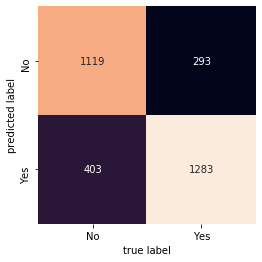

In [202]:
#Confusion Matrix
mat_rf = confusion_matrix(y_test, pred_ada)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [203]:
# Saving the accuracy for ADABoost
cl = classification_report(y_test,  pred_ada)
sum_met.at['accuracy','ADABoost'] = list_of_words[list_of_words.index('accuracy') + 1]

 ## XGBoost


In [205]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
pred_xg = model.predict(X_test)

[23:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [206]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_xg ))

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      1522
         1.0       0.81      0.91      0.86      1576

    accuracy                           0.85      3098
   macro avg       0.86      0.85      0.85      3098
weighted avg       0.86      0.85      0.85      3098



Text(91.68, 0.5, 'predicted label')

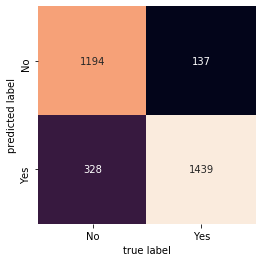

In [207]:
#Confusion Matrix
mat_rf = confusion_matrix(y_test, pred_xg)
sns.heatmap(mat_rf.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [208]:

# Saving the accuracy for XGBoost
cl = classification_report(y_test,  pred_xg)
list_of_words = cl.split()
sum_met.at['accuracy','XGboost'] = list_of_words[list_of_words.index('accuracy') + 1]

## Comparaison

In [191]:
sum_met

,Naive_Bayes,Decision_Tree,SVM,Logistic_Regression,Random_Forest,KNN,ANN,ADABoost,XGboost,REGRESSION,CHAID,C4.5,ID3,CART
accuracy,0.74,0.79,0.78,0.76,0.88,0.76,0.77,0.78,0.85,0.66,0.66,0.87,0.88,0.89
